# Statistical physics of graphs and networks
## *Project:* study of the configuration model of random graphs
### *Master in physics of complex systems*
Joseph Touzet

We first import a few packages:

In [12]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

We will use _networkx_ to manage and plot networks.

We also define the parameter for ploting networks:

In [13]:
options = {
    "font_size": 2,
    "node_size": 10,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 4,
    "width": 3,
}

### Problem 1: Generation of instances of the random graph model

First we will implement a few utility functions:

In [3]:
def choose_and_pop_from_list(items):
    index = random.randrange(len(items))
    return items.pop(index)

And then move on to the main asked functions:

In [76]:
def gen_rgm(N, pi):
    G = nx.Graph()
    for i in range(N):
        G.add_node(i)

    n_d1 = int(np.round(N*(1 - pi)/2)*2) # so that n_d1 + 4*n_d4 is pair
    n_d4 = N - n_d1

    stubs = []
    for i in range(n_d1):
        stubs.append(i)
    for i in range(n_d1, N):
        for j in range(4):
            stubs.append(i)
    
    while stubs:
        j = choose_and_pop_from_list(stubs)
        k = choose_and_pop_from_list(stubs)
        G.add_edge(j, k)
        G.add_edge(k, j)

    return G

def gen_rgm_biased(N, pi):
    G = nx.Graph()
    for i in range(N):
        G.add_node(i)

    n_d1 = int(np.round(N*(1 - pi)/2)*2) # so that n_d1 + 4*n_d4 is pair
    n_d4 = N - n_d1

    stubs = []
    for i in range(n_d1):
        stubs.append(i)
    for i in range(n_d1, N):
        for j in range(4):
            stubs.append(i)
    
    while stubs:
        j = choose_and_pop_from_list(stubs)
        k = choose_and_pop_from_list(stubs)
        if k != j and not G.has_edge(j, k):
            G.add_edge(j, k)
            G.add_edge(k, j)

    return G

Which we then test:

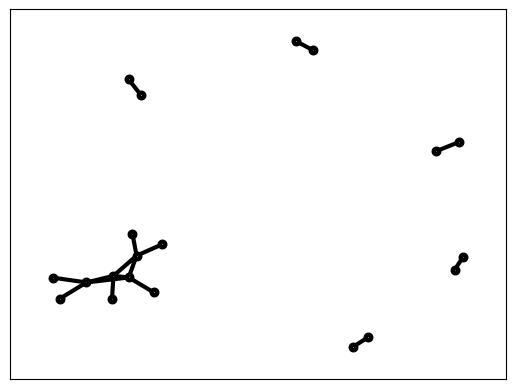

In [77]:
graph = gen_rgm_biased(20, 0.2)

nx.draw_networkx(graph, **options)

## Problem 2: The giant component

We first need a function that (recursivly) walks through a graph to get the connected component starting from a given node:

In [78]:
def get_connected_component(graph, node, visited=None):
    if visited is None:
        visited = []
    visited.append(node)
    
    for neighbor in graph.neighbors(node):
        if neighbor not in visited:
            connected = get_connected_component(graph, neighbor, visited)
            
            for connected_node in connected:
                if connected_node not in visited:
                    visited.append(connected_node)
    return visited

We then use this function to efficently go through connected components (once per connected components), and return the largest connected components once there is not enough nodes to hope to find another even larger connected component:

In [79]:
def find_largest_connected_component(graph):
    n_nodes     = graph.number_of_nodes()
    not_visited = list(range(n_nodes))
    
    largest_connected_component = []
    while True:
        starting_node = not_visited[0]
        connected_component = get_connected_component(graph, starting_node)

        for node in connected_component:
            not_visited.remove(node)

        if len(connected_component) >= len(largest_connected_component):
            largest_connected_component = connected_component
            
        if len(not_visited) <= len(largest_connected_component):
            return largest_connected_component

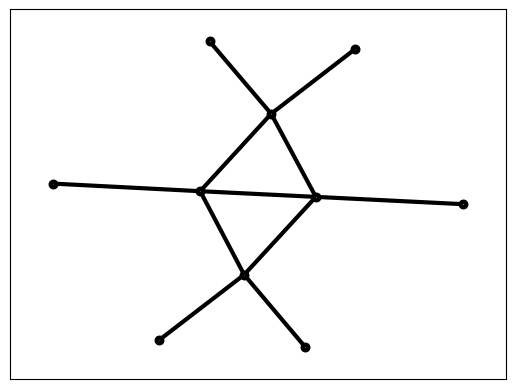

In [80]:
largest_connected_component = find_largest_connected_component(graph)
largest_connected_subgraph = graph.subgraph(largest_connected_component)

nx.draw_networkx(largest_connected_subgraph, **options)

(a) We can now plot the average proportion of nodes inside of the giant component versus the value of $\pi$:

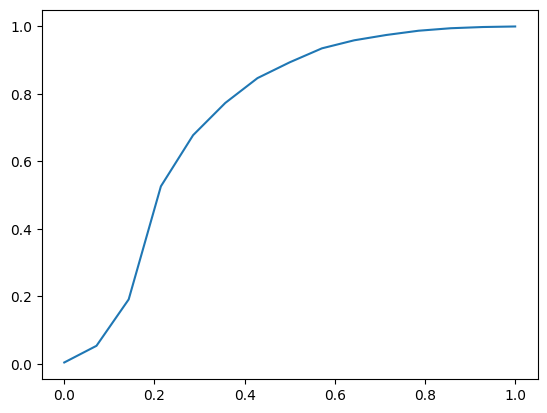

In [92]:
N, size = 10, 200
pis = np.linspace(0, 1, 15)

avg_size = []
for pi in pis:
    avg_size.append(0)
    for n in range(N):
        graph = gen_rgm_biased(size, pi)
        largest_connected_component = find_largest_connected_component(graph)
        avg_size[-1] += len(largest_connected_component)
    avg_size[-1] /= N*size

plt.plot(pis, avg_size)